In [4]:
!pip install pandas nltk emoji wordcloud matplotlib
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
!pip install pandas numpy matplotlib seaborn wordcloud nltk emoji textblob vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [9]:
import re, os, sys
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import emoji
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
!pip install pandas matplotlib seaborn wordcloud nltk emoji textblob

In [14]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import emoji
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
sample_chat = """01/09/2025, 10:15 - Alice: Hey, how are you?
01/09/2025, 10:16 - Bob: I am fine! How about you? 😀
01/09/2025, 10:17 - Alice: Doing good, just working on my project.
01/09/2025, 10:18 - Charlie: Hello guys 👋
01/09/2025, 10:20 - Alice: Let's meet tomorrow?
01/09/2025, 10:21 - Bob: Sure 👍
01/09/2025, 10:22 - Charlie: Okay ✅
"""
with open("whatsapp.txt", "w", encoding="utf-8") as f:
    f.write(sample_chat)

print("Sample WhatsApp chat file created!")

Sample WhatsApp chat file created!


In [19]:
with open("whatsapp.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print(raw_text)

01/09/2025, 10:15 - Alice: Hey, how are you?
01/09/2025, 10:16 - Bob: I am fine! How about you? 😀
01/09/2025, 10:17 - Alice: Doing good, just working on my project.
01/09/2025, 10:18 - Charlie: Hello guys 👋
01/09/2025, 10:20 - Alice: Let's meet tomorrow?
01/09/2025, 10:21 - Bob: Sure 👍
01/09/2025, 10:22 - Charlie: Okay ✅



In [21]:
import re
import pandas as pd

pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)"
messages = []

for line in raw_text.split("\n"):
    m = re.match(pattern, line)
    if m:
        date, time, author, msg = m.groups()
        messages.append([date, time, author, msg])

df = pd.DataFrame(messages, columns=["date", "time", "author", "message"])
df.head()

,date,time,author,message
0,01/09/2025,10:15,Alice,"Hey, how are you?"
1,01/09/2025,10:16,Bob,I am fine! How about you? 😀
2,01/09/2025,10:17,Alice,"Doing good, just working on my project."
3,01/09/2025,10:18,Charlie,Hello guys 👋
4,01/09/2025,10:20,Alice,Let's meet tomorrow?


In [22]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["date"])
df["message"] = df["message"].astype(str)
df.head()

,date,time,author,message
0,2025-09-01,10:15,Alice,"Hey, how are you?"
1,2025-09-01,10:16,Bob,I am fine! How about you? 😀
2,2025-09-01,10:17,Alice,"Doing good, just working on my project."
3,2025-09-01,10:18,Charlie,Hello guys 👋
4,2025-09-01,10:20,Alice,Let's meet tomorrow?


/tmp/ipython-input-511921909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="Blues_r")


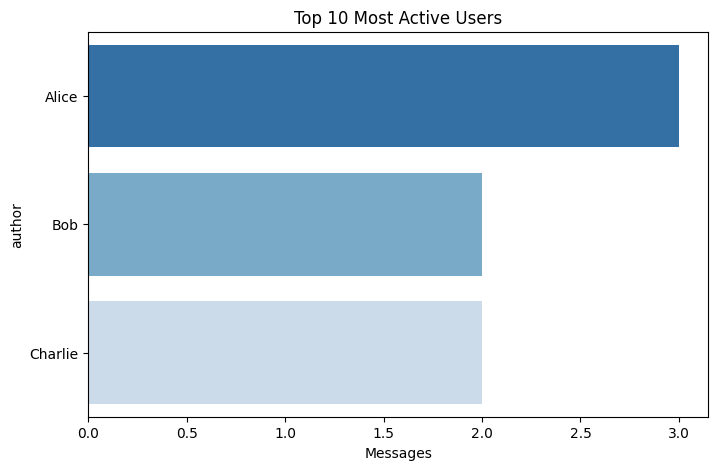

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

top_users = df["author"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_users.values, y=top_users.index, palette="Blues_r")
plt.title("Top 10 Most Active Users")
plt.xlabel("Messages")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


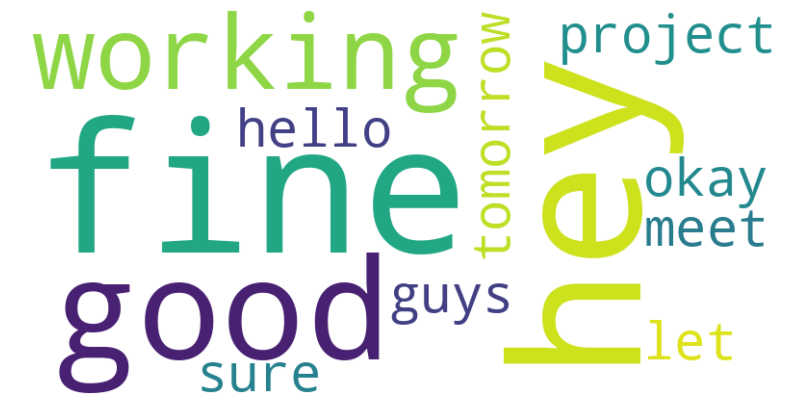

In [25]:
# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download required NLTK resources
nltk.download("punkt")
nltk.download("punkt_tab")   # <-- needed for new nltk versions
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define stopwords
stop_words = set(stopwords.words("english"))
words = []

# Loop through messages (make sure df is created from parsing step)
for msg in df["message"].dropna():
    tokens = word_tokenize(msg.lower())
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    words.extend(tokens)

# Join all words
text_all = " ".join(words)

# Generate wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text_all)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
import emoji
from collections import Counter

def extract_emojis(s):
    return [c for c in s if c in emoji.EMOJI_DATA]

df["emojis"] = df["message"].apply(extract_emojis)
emoji_list = [e for lst in df["emojis"] for e in lst]
emoji_counts = Counter(emoji_list).most_common(5)
print("Top emojis:", emoji_counts)

Top emojis: [('😀', 1), ('👋', 1), ('👍', 1), ('✅', 1)]
